# Look at all features that go into the GBDTs for protons and non-protons

In [1]:
from notebooks_tools import *
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



# load MC tracks

In [2]:
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]
MCBNB_rec_nonprotons = MCBNB_rec[MCBNB_rec.MCpdgCode!=2212]

In [4]:
print 'reconstructed events with at least one contained track:',len(MCBNB_rec.groupby(['run','subrun','event'])) 
print 'reconstructed contained tracks:',len(MCBNB_rec)
print 'reconstructed contained primary protons:',len(MCBNB_rec_protons)
print 'reconstructed contained primary protons with track > 1.5 cm:',len(MCBNB_rec_protons[MCBNB_rec_protons.length>1.5]) 

reconstructed events with at least one contained track: 206358
reconstructed contained tracks: 387789
reconstructed contained primary protons: 134019
reconstructed contained primary protons with track > 1.5 cm: 127032


# features

In [3]:
feature_names = [ 
    # geometry    
    'nhits','length','starty','startz','endy','endz','theta','phi', 'distlenratio'    
    # calorimetry    
    ,'startdqdx','enddqdx','dqdxdiff','dqdxratio','totaldqdx','averagedqdx'    
    # uboonecode tagging and PID    
    ,'cosmicscore','coscontscore','pidpida','pidchi'    
    # optical information - unused for open cosmic MC    
    ,'cfdistance'  
    #  necessary for training..
    ,'MCpdgCode' , 'truth_KE'     
]

In [26]:
def plot_protons_nonprotons_feature(var = 'theta' , x_label='$\\theta$ [deg.]' , multiply=1,
                                    bins = np.linspace(-1,181,50) ,
                                    histtype='step' , linewidth=2 ,
                                    figsize=(10,10) , legend_loc='best' , yscale='norm',
                                    do_save_fig=False):

    fig,ax = plt.subplots(figsize=figsize)
    plt.hist(multiply*MCBNB_rec_protons[var] , bins=bins,histtype=histtype , linewidth=linewidth , label='protons' , normed=1);
    plt.hist(multiply*MCBNB_rec_nonprotons[var] , bins=bins,histtype=histtype , linewidth=linewidth , label='non - protons' , normed=1);
    set_axes(ax , x_label=x_label , y_label='' , fontsize=25)
    ax.legend(loc=legend_loc , fontsize=25 )
    ax.set_yscale(yscale)
    if do_save_fig:
        fig.savefig('/Users/erezcohen/Desktop/uBoone/analysis/GBDTs/features/protons_nonprotons_%s.pdf'%var)
    return ax


variable "ax" not defined.

variable "ax.set_s" not defined.

variable "ax" not defined.

variable "ax.set_sc" not defined.

tab completion not implemented for this context


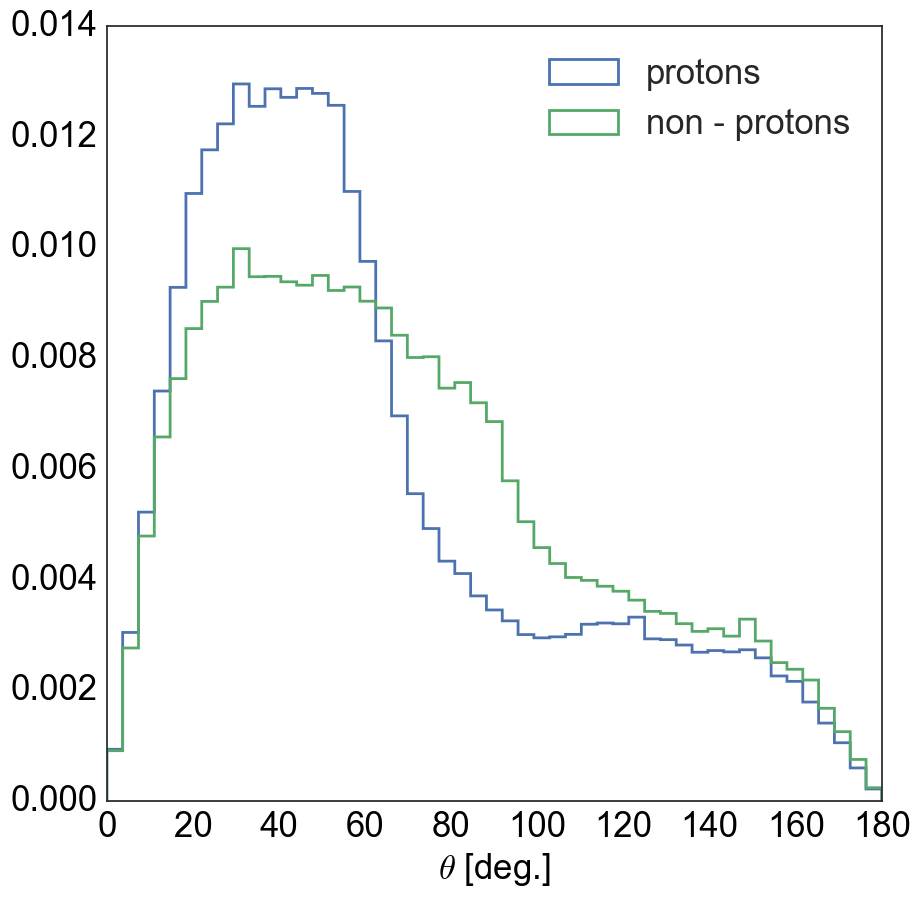


tab completion not implemented for this context

tab completion not implemented for this context

tab completion not implemented for this context


In [20]:
plot_protons_nonprotons_feature(var = 'theta' , x_label='$\\theta$ [deg.]' , multiply=180/3.1415,
                                    bins = np.linspace(0,180,50) ,
                                    histtype='step' , linewidth=2 ,
                                    figsize=(10,10) , legend_loc='best' , do_save_fig=True)

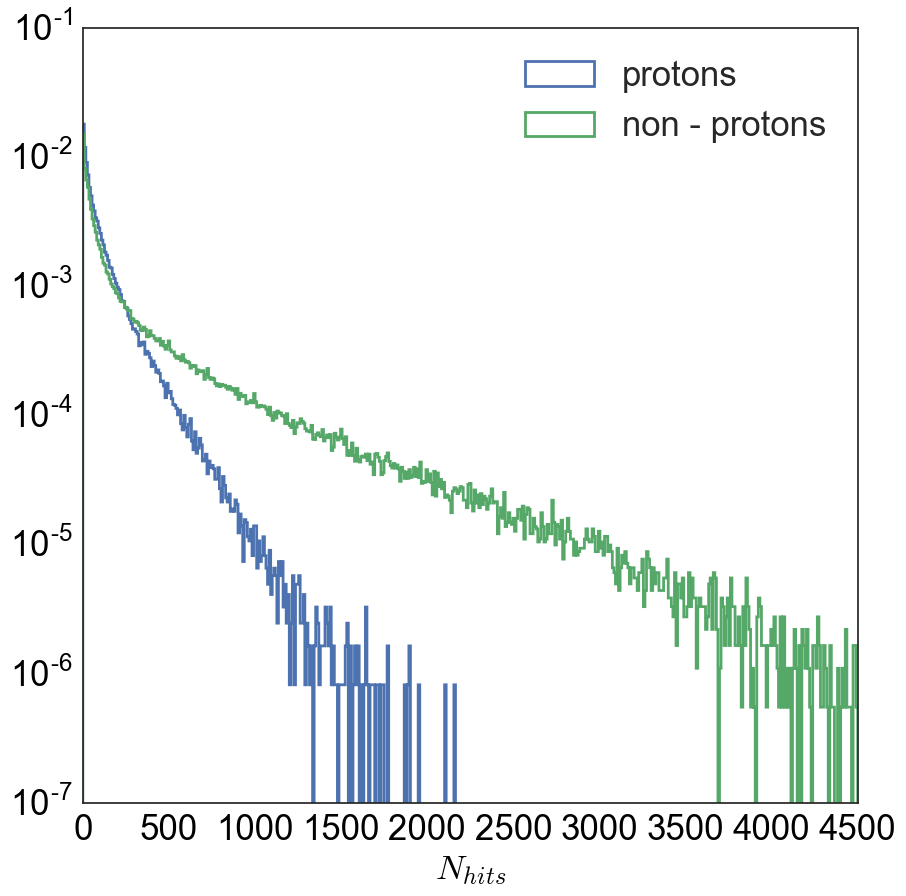

In [32]:
plot_protons_nonprotons_feature(var = 'nhits' , x_label='$N_{hits}$' , yscale='log',
                                    bins = np.linspace(0,4500,500) ,do_save_fig=True)

In [ ]:
plot_protons_nonprotons_feature(var = 'length' , x_label='$N_{hits}$' , yscale='log',
                                    bins = np.linspace(0,4500,500) ,do_save_fig=True)